In [270]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

In [271]:
# variant 27
# f(x) = sin^2( cos (x) )
# [-1.5, 1.5]

In [272]:
# parameters that can be changed

n = 14            # number of points

In [308]:
# function declaration

a = -1.5
b = 1.5
h = (b - a) / n

x = symbols('x')
f_x = (sin(cos(x)))**2
f_x

sin(cos(x))**2

In [309]:
# 1st derivative

derivative_f_x = diff(f_x, x)
derivative_f_x

-2*sin(x)*sin(cos(x))*cos(cos(x))

In [310]:
# defenition of fragmentation

coords = []
h = (b - a) / n
print("h: ", h)
for i in range(n):
    coords.append(a + i * h)
#coords

h:  0.23076923076923078


In [311]:
# counting right derivative 

right_derivative = []
right_derivative_coords = []


for i in range(n - 1):
    right_derivative_coords.append(coords[i])
    curr_right_derivate = (f_x.subs('x', coords[i + 1]) - f_x.subs('x', coords[i])) / h
    right_derivative.append(curr_right_derivate)
    
# adding right side
right_derivative_coords.append(b)
right_derivative.append(f_x.subs('x', coords[len(coords) - 1]) - f_x.subs('x', coords[len(coords) - 2]) / h)

#right_derivative

In [312]:
# checking right derivative

check_coords = right_derivative_coords

check_values = []
for i in range(len(check_coords)):
    check_values.append(derivative_f_x.subs(x, check_coords[i]).n())
#check_values

current_values = right_derivative

deviation = []
for i in range(len(check_coords)):
    deviation.append(abs(check_values[i] - current_values[i]))
max(deviation)

0.225523783290382

In [313]:
# counting central derivative 

central_derivative = []
central_derivative_coords = []

# adding left side
central_derivative_coords.append(a)
central_derivative.append(-3/2 * f_x.subs('x', coords[0]) + 2 * f_x.subs('x', coords[1]) - 1/2 * f_x.subs('x', coords[2]) / h)

for i in range(1, n - 1):
    central_derivative_coords.append(coords[i])
    curr_central_derivate = (f_x.subs('x', coords[i + 1]) - f_x.subs('x', coords[i - 1])) / (2 * h)
    central_derivative.append(curr_central_derivate)

# adding right side
central_derivative_coords.append(b)
central_derivative.append(-3/2 * f_x.subs('x', coords[n - 1]) + 2 * f_x.subs('x', coords[n - 2]) - 1/2 * f_x.subs('x', coords[n - 3]) / h)

#central_derivative

In [314]:
# checking central derivative

check_coords = central_derivative_coords

check_values = []
for i in range(len(check_coords)):
    check_values.append(derivative_f_x.subs(x, check_coords[i]).n())
#check_values

current_values = central_derivative

deviation = []
for i in range(len(check_coords)):
    deviation.append(abs(check_values[i] - current_values[i]))
max(deviation)

0.488664649616796

In [315]:
# make interpolation (from previous task) for making plots of derivatives

def interolateFunc(f_x, a, b, coords, values):
    x = symbols('x')
    F_x = 0
    for i in range(len(coords)):
        curr = values[i]
        for k in range(len(coords)):
            if k != i:
                curr *= (x - coords[k]) / (coords[i] - coords[k])
        F_x += curr
    check_coords = []
    for i in range(len(coords) - 1):
        check_coords.append((coords[i + 1] + coords[i]) / 2)
    check_values = []
    for i in range(len(check_coords)):
        check_values.append(f_x.subs(x, check_coords[i]).n())
    current_values = []
    for i in range(len(check_coords)):
        current_values.append(F_x.subs(x, check_coords[i]).n())
    abses = []
    for i in range(len(check_coords)):
        abses.append(np.absolute(check_values[i] - current_values[i]))
    return [max(abses), (x, a, b), F_x, f_x]

0.0993177731502112


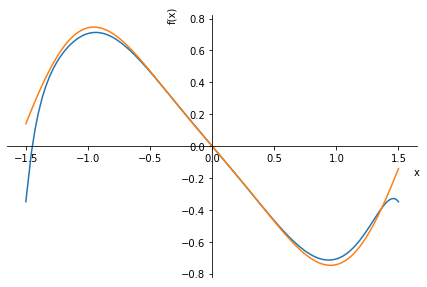

In [316]:
# plotting central derivatives (blue - counted, orange - original)

result = interolateFunc(derivative_f_x, a, b, central_derivative_coords, central_derivative)
print(result[0])
plot(result[2], result[3], result[1])

0.167553631304951


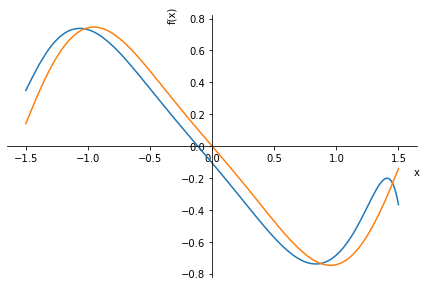

In [318]:
# plotting right derivatives (blue - counted, orange - original)

result = interolateFunc(derivative_f_x, a, b, right_derivative_coords, right_derivative)
print(result[0])
plot(result[2], result[3], result[1])

In [319]:
# 2nd derivative

second_derivative_f_x = diff(derivative_f_x)
second_derivative_f_x

-2*sin(x)**2*sin(cos(x))**2 + 2*sin(x)**2*cos(cos(x))**2 - 2*sin(cos(x))*cos(x)*cos(cos(x))

In [320]:
# counting 2nd derivative with accuracy 2

central_second_derivative_2 = []
central_second_derivative_2_coords = []
for i in range(n):
    central_second_derivative_2_coords.append(coords[i])
    curr_central_second_derivative_2 = (f_x.subs('x', (coords[i] - h)) - 2 * f_x.subs('x', coords[i]) + f_x.subs('x', (coords[i] + h))) / (h * h)
    central_second_derivative_2.append(curr_central_second_derivative_2)
#central_second_derivative_2

0.0515345310016226


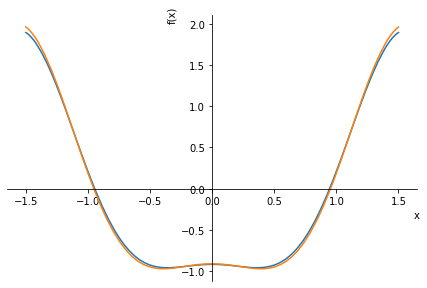

In [321]:
# plotting 2nd derivative (2)

result = interolateFunc(second_derivative_f_x, a, b, central_second_derivative_2_coords, central_second_derivative_2)
print(result[0])
plot(result[2], result[3], result[1])

In [322]:
# counting 2nd derivative with accuracy 4

central_second_derivative_4 = []
central_second_derivative_4_coords = []
for i in range(n):
    central_second_derivative_4_coords.append(coords[i])
    curr_central_second_derivative_4 = (-1/12 * f_x.subs('x', coords[i] + 2 * h) + 4/3 * f_x.subs('x', coords[i] + h) - 5/2 * f_x.subs('x', coords[i]) + 4/3 * f_x.subs('x', coords[i] - h) - 1/12 * f_x.subs('x', coords[i] - 2 * h)) / (h * h)
    central_second_derivative_4.append(curr_central_second_derivative_4)
#central_second_derivative_2

0.00436063563702256


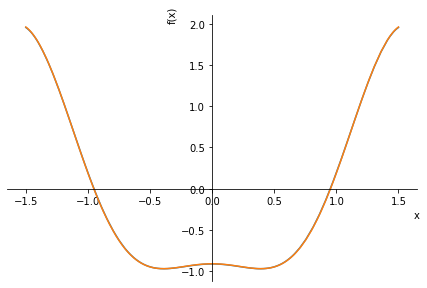

In [305]:
# plotting 2nd derivative (4)

result1 = interolateFunc(second_derivative_f_x, a, b, central_second_derivative_4_coords, central_second_derivative_4)
print(result1[0])
plot(result1[2], result1[3], result1[1])

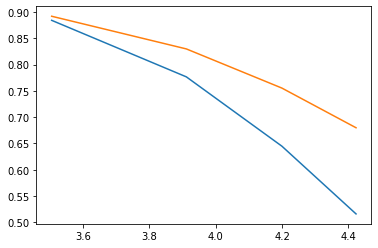

In [351]:
# plotting deviation (right + central)

start_index = 100
end_index = 300
step = 50

# init
h_s = []
deviation_right = []
deviation_central = []
for n_i in range(start_index, end_index, step):
    
    # current h
    h = (b - a) / n_i
    h_s.append(abs(log(h)))
    
    # current coords
    coords = [a + i * h for i in range(n_i)]
    
    # current right derivative
    right_derivative_coords = []
    right_derivative = []
    for i in range(n_i - 1):
        right_derivative_coords.append(coords[i])
        curr_right_derivate = (f_x.subs('x', coords[i + 1]) - f_x.subs('x', coords[i])) / h
        right_derivative.append(curr_right_derivate)
    right_derivative_coords.append(b)
    right_derivative.append(f_x.subs('x', coords[n_i - 1]) - f_x.subs('x', coords[n_i - 2]) / h)
    
    # prepearing checking data
    check_coords = right_derivative_coords
    check_values = []
    for i in range(len(check_coords)):
        check_values.append(derivative_f_x.subs(x, check_coords[i]).n())
    current_values = right_derivative
    deviation = []
    for i in range(len(check_coords)):
        deviation.append(abs(check_values[i] - current_values[i]))
    
    # counting current deviation
    deviation_right.append(abs(log(max(deviation))))
    
    
    # current central derivative 
    central_derivative = []
    central_derivative_coords = []
    central_derivative_coords.append(a)
    central_derivative.append(-3/2 * f_x.subs('x', coords[0]) + 2 * f_x.subs('x', coords[1]) - 1/2 * f_x.subs('x', coords[2]) / h)
    for i in range(1, n_i - 1):
        central_derivative_coords.append(coords[i])
        curr_central_derivate = (f_x.subs('x', coords[i + 1]) - f_x.subs('x', coords[i - 1])) / (2 * h)
        central_derivative.append(curr_central_derivate)
    central_derivative_coords.append(b)
    central_derivative.append(-3/2 * f_x.subs('x', coords[n_i - 1]) + 2 * f_x.subs('x', coords[n_i - 2]) - 1/2 * f_x.subs('x', coords[n_i - 3]) / h)
    
    # prepearing checking data
    check_coords = central_derivative_coords
    check_values = []
    for i in range(len(check_coords)):
        check_values.append(derivative_f_x.subs(x, check_coords[i]).n())
    current_values = central_derivative
    deviation = []
    for i in range(len(check_coords)):
        deviation.append(abs(check_values[i] - current_values[i]))
    
    # counting current deviation
    deviation_central.append(abs(log(max(deviation))))
    
    
plt.plot(h_s, deviation_right)
plt.plot(h_s, deviation_central)
# blue - deviation_right; orange - deviation_central

In [ ]:
# plotting second deviation (2 + 4)

start_index = 100
end_index = 10000
step = 50

h_s = []
deviation_central_second_2 = []
deviation_central_second_4 = []
for n_i in range(start_index,end_index, step):
    
    # current h
    h = (b - a) / n_i
    h_s.append(abs(log(h).n()))
    
    # current coords
    coords = [a + i * h for i in range(n_i)]
    
    # current second derivative 4
    central_second_derivative_4 = []
    central_second_derivative_4_coords = []
    for i in range(len(coords)):
        central_second_derivative_4_coords.append(coords[i])
        curr_central_second_derivative_4 = (-1/12 * f_x.subs('x', coords[i] + 2 * h).n() + 4/3 * f_x.subs('x', coords[i] + h).n() - 5/2 * f_x.subs('x', coords[i]).n() + 4/3 * f_x.subs('x', coords[i] - h).n() - 1/12 * f_x.subs('x', coords[i] - 2 * h).n()) / (h * h)
        central_second_derivative_4.append(curr_central_second_derivative_4)
    
    # prepearing checking data
    check_coords = central_second_derivative_4_coords
    check_values = []
    for i in range(len(check_coords)):
        check_values.append(derivative_f_x.subs(x, check_coords[i]))
    current_values = central_second_derivative_4
    deviation = []
    for i in range(len(check_coords)):
        deviation.append(abs(check_values[i] - current_values[i]))
    
    # counting current deviation
    deviation_central_second_4.append(abs(log(max(deviation)).n()))
    
    # current second derivative 2
    central_second_derivative_2 = []
    central_second_derivative_2_coords = []
    for i in range(len(coords)):
        central_second_derivative_2_coords.append(coords[i])
        curr_central_second_derivative_2 = (f_x.subs('x', (coords[i] - h)).n() - 2 * f_x.subs('x', coords[i]).n() + f_x.subs('x', (coords[i] + h)).n()) / (h * h)
        central_second_derivative_2.append(curr_central_second_derivative_2)
        
    # prepearing checking data
    check_coords = central_second_derivative_2_coords
    check_values = []
    for i in range(len(check_coords)):
        check_values.append(derivative_f_x.subs(x, check_coords[i]).n())
    current_values = central_second_derivative_2
    deviation = []
    for i in range(len(check_coords)):
        deviation.append(abs(check_values[i] - current_values[i]))
    
    # counting current deviation
    deviation_central_second_2.append(abs(log(max(deviation)).n()))
    
plt.plot(h_s, deviation_central_second_2)
plt.plot(h_s, deviation_central_second_4)
# blue - deviation_central_second_2; orange - deviation_central_second_4